## Matplotlib: case COVID-19
Matplotlib is the most commonly used Python library for visualizing data. See https://jakevdp.github.io/PythonDataScienceHandbook/, a free online book by Jake Van der Plas, that covers a.o. pandas, matplotlib and machine learning.

In [1]:
import pandas as pd
import numpy as np

The Johns Hopins University publishes daily updated data about the spread of the COVID-19 virus: new cases, deaths and recovered. 

In [2]:
# link: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',sep=',')

In [3]:
covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,925,937,939,939,944,955,955,955,963,963
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,874,874,875,878,878,878,878,878,878,881
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1734,1734,1760,1763,1768,1796,1797,1804,1832,1831
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,386,386,388,388,396,396,399,399,399,399
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,7495,7538,7583,7625,7665,7706,7706,7745,7827,7871


In [4]:
belgium = covid[covid['Country/Region']=='Belgium']
belgium

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
23,NaN,Belgium,50.8333,4.469936,0,0,0,0,0,0,...,69849,70314,70648,71158,72016,72784,73401,74152,74620,75008


In [5]:
Brazil = covid[covid['Country/Region']=='Brazil']

In [6]:
Brazil.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,2733677,2750318,2801921,2859073,2912212,2962442,3012412,3035422,3057470,3057470


In [7]:
# make Series of inhabitants per country (source: wikipedia)
inhabitants = pd.Series()
inhabitants['Belgium'] = 11491346
inhabitants['France'] = 64834000  # metropolitan France only
inhabitants['Netherlands'] = 17424978
inhabitants['Italy'] = 60317546
inhabitants['Spain'] = 46733038
inhabitants['Germany'] = 83149300
inhabitants['China'] = 58500000 #Hubei only
inhabitants['United Kingdom'] = 67545757
inhabitants['US'] = 326625791
inhabitants['Iran'] = 82021564
inhabitants['Sweden'] = 9960487
inhabitants['Denmark'] = 5605948
inhabitants['Finland'] = 5518371 
inhabitants['Norway'] = 5367580
inhabitants['Austria'] = 8754413
inhabitants['Switzerland'] = 8236303
inhabitants['India'] = 1281935911
inhabitants['Brazil'] = 207353391

<ipython-input-7-50dc5959106a>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  inhabitants = pd.Series()


In [8]:
def DrawCurve(province,country,color):
    if province == '':
        df = covid[(covid['Country/Region']==country) & (covid['Province/State'].isnull())]  # isnull()==True if NaN
    else:
        df = covid[(covid['Province/State']==province) & (covid['Country/Region']==country)]

    df = df.drop(['Province/State','Country/Region','Lat','Long'],axis=1)
    
    df_2 = df.T  # transpose
    
    df_2 = df_2.rename(columns={df_2.columns[0]:'cases'})   

    df_2['new_cases'] = df_2['cases'] - df_2.cases.shift(1)  # shift(1) returns the previous line

    df_2['new_cases'] = np.round(df_2['new_cases']*1000000.0/inhabitants[country],1)  # cases per million inhabitants

    # skip days at beginning as long as new_cases (per million) < 10
    for index,row in df_2.iterrows():
        if row['new_cases'] >= 10:
            break
        else:
            df_2.drop(index,inplace=True)
  
    df_2 = df_2.reset_index() # brengt de index naar een kolom met naam 'index'

    df_2 = df_2.drop(['index'],axis=1)
    df_2 = df_2.reset_index()

    df_2['new_cases'] = df_2['new_cases'].rolling(7).mean() # moving average of last 7 days 
    df_2 = df_2.rename(columns={'index':'dayssincefirst'})
    
    plt.plot(df_2['dayssincefirst'], df_2['new_cases'], color=color, label=country+' '+province, linewidth=3.0)

In [9]:
from datetime import datetime
last_update = covid.columns[-1]
last_update = datetime.strptime(last_update, '%m/%d/%y')
last_update = datetime.strftime(last_update,'%Y-%m-%d')

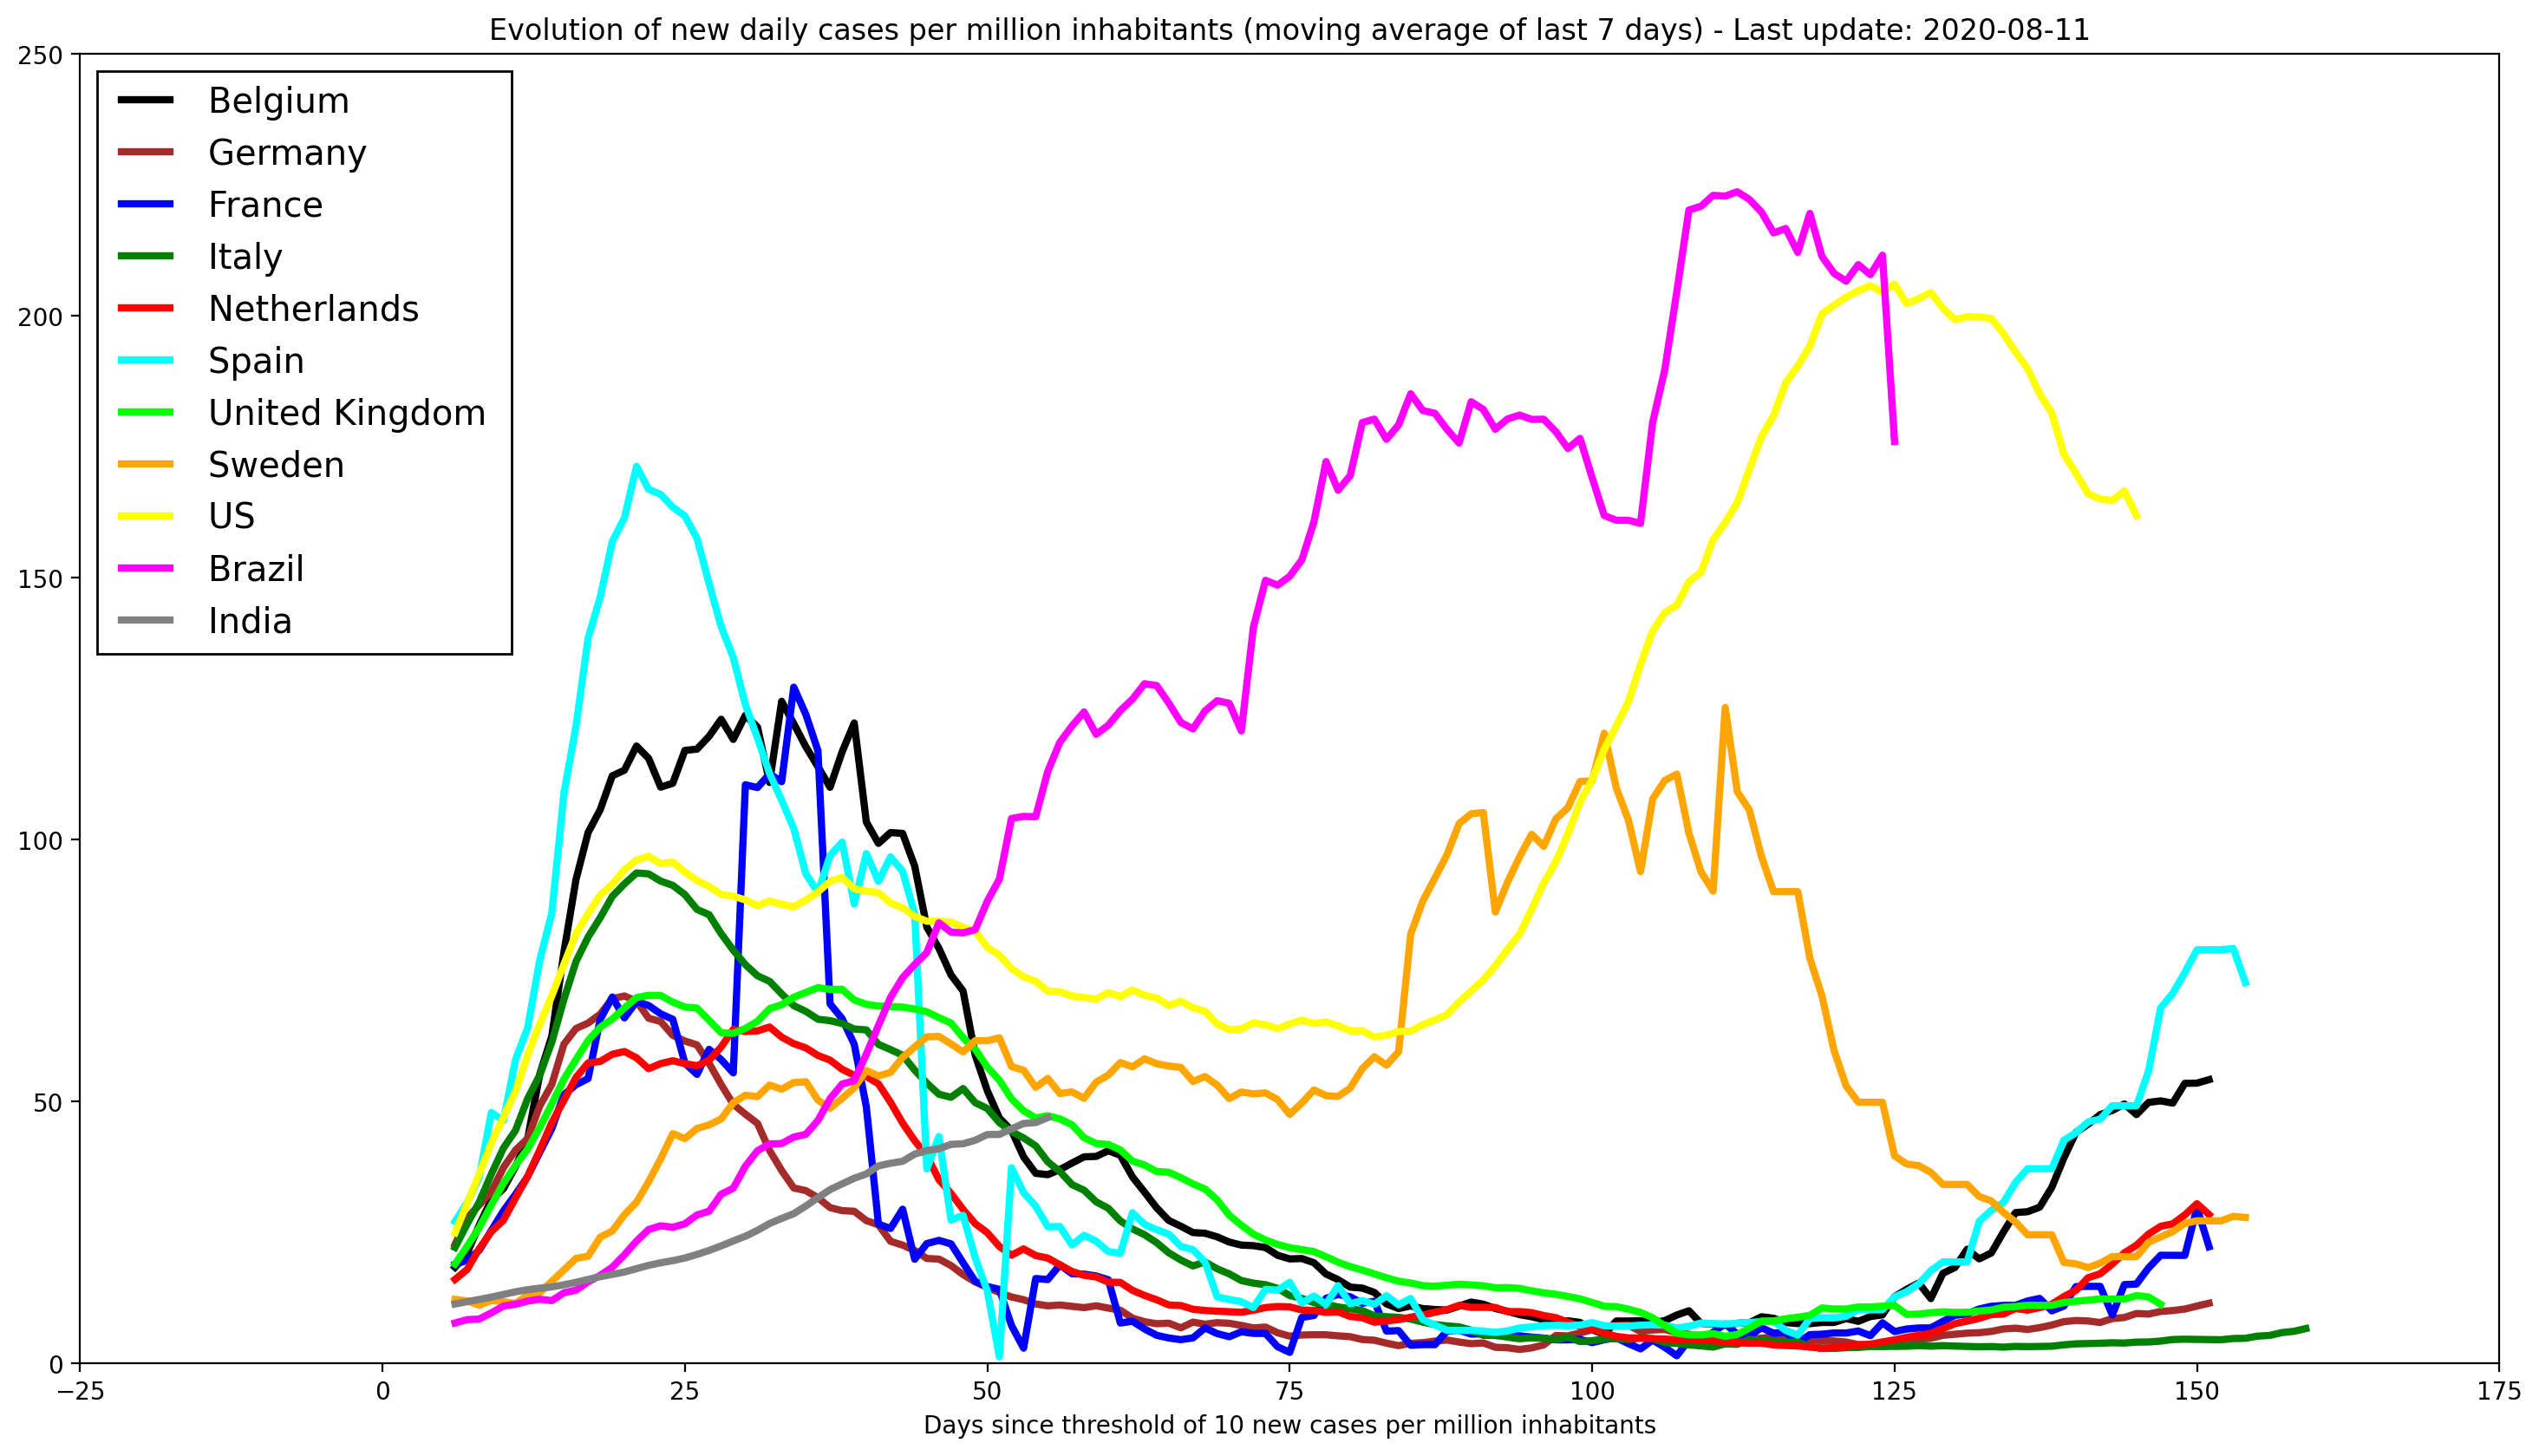

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline
# set the size of the diagrams
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,7
rcParams['figure.dpi'] = 200
plt.xlabel('Days since threshold of 10 new cases per million inhabitants')
plt.ylim([0,250])
plt.title('Evolution of new daily cases per million inhabitants (moving average of last 7 days) - Last update: ' + last_update)
plt.style.use('classic')

DrawCurve('','Belgium',color='black')

DrawCurve('','Germany',color='brown')
DrawCurve('','France',color='blue')
DrawCurve('','Italy',color='green')
DrawCurve('','Netherlands',color='red')
DrawCurve('','Spain',color='cyan')
# DrawCurve('Hubei','China',color='magenta')
DrawCurve('','United Kingdom',color='#00ff00')
DrawCurve('','Sweden',color='orange')
DrawCurve('','US',color='yellow')
DrawCurve('','Brazil',color='magenta')
DrawCurve('','India',color='grey')

plt.legend(loc='best',frameon=True)

plt.show()
    

In [11]:
# show top 10 of countries with most deaths per 1.000.000 inhabitants
# import data
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',sep=',')

# totaldeaths is value in last column
deaths['totaldeaths'] = deaths[deaths.columns[-1]]

# keep only relevant columns
deaths = deaths[['Country/Region','Province/State','totaldeaths']]
print(deaths.sort_values(by='totaldeaths',ascending=False).head(15))

def inh(c):
    if c in inhabitants:
        return inhabitants[c]
    else:
        return 1000000000
    
deaths['inhabitants'] = deaths['Country/Region'].map(inh)
print(deaths.head(15))
deaths['totaldeathspermillion'] = deaths['totaldeaths']*1000000/deaths['inhabitants']

     Country/Region Province/State  totaldeaths
225              US            NaN       164537
28           Brazil            NaN       101752
158          Mexico            NaN        53929
223  United Kingdom            NaN        46526
131           India            NaN        46091
137           Italy            NaN        35215
116          France            NaN        30201
201           Spain            NaN        28581
181            Peru            NaN        21276
133            Iran            NaN        18800
187          Russia            NaN        15103
82         Colombia            NaN        13475
200    South Africa            NaN        10751
48            Chile            NaN        10178
23          Belgium            NaN         9885
         Country/Region                Province/State  totaldeaths  \
0           Afghanistan                           NaN         1344   
1               Albania                           NaN          205   
2               Algeri

In [12]:
# sort by totaldeaths
top10 = deaths.sort_values(by='totaldeathspermillion',ascending=False).head(10).reset_index().drop(['index'],axis=1).reset_index()
top10['Rank'] = top10['index'] + 1
top10 = top10[['Rank','Country/Region','totaldeathspermillion']]
top10

,Rank,Country/Region,totaldeathspermillion
0,1,Belgium,860.212546
1,2,United Kingdom,688.807144
2,3,Spain,611.580184
3,4,Italy,583.826802
4,5,Sweden,579.288944
5,6,US,503.747728
6,7,Brazil,490.717801
7,8,France,465.820403
8,9,Netherlands,352.425122
9,10,Switzerland,241.613258
